# Análises dos Dados

## A seguir temos as análises dos dados tratados e filtrados, na seguinte ordem:

1. Análises temporais, de perfil e de distribuição dos pacientes
2. Testando a hipótese 1 - "Poucas pessoas concluem tendo chegado até a sexta consulta realizada"
3. Testando a hipótese 2 - "Para cada consulta realizada, há pelo menos mais uma interação de fracasso (fracasso = Reagendou, Falta)"



In [1]:
%run Flua_job1_tratamento_dados.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA                  2071 non-null   datetime64[ns]
 1   MES                   2071 non-null   int64         
 2   ANO                   2071 non-null   int64         
 3   NUTRICIONISTA         2071 non-null   object        
 4   ID_CASO               1745 non-null   object        
 5   PACIENTE_NOME         2071 non-null   object        
 6   CONSULTA_ESTAGIO      2071 non-null   int64         
 7   OBJETIVO_PACIENTE     1299 non-null   object        
 8   IDIOMA                1451 non-null   object        
 9   STATUS_ATENDIMENTO    2071 non-null   object        
 10  ENGAJAMENTO_STATUS    263 non-null    object        
 11  MENSAGEM_ENVIADA      240 non-null    object        
 12  ENGAJAMENTO_DESFECHO  233 non-null    object        
 13  ENCERRAMENTO_CASO 

/tmp/ipykernel_6582/2784136694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_b1['INTERVENCAO'] = df_b1['MENSAGEM_ENVIADA_RC'].replace({'Personalizada': 1,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_CASO               1193 non-null   int64 
 1   PACIENTE_NOME         1193 non-null   object
 2   CONSULTA_ESTAGIO_MAX  1193 non-null   int64 
 3   TOTAL_REALIZADAS      1193 non-null   int64 
 4   TOTAL_FALTAS          1193 non-null   int64 
 5   TOTAL_REAGENDAMENTOS  1193 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 56.1+ KB
ENCERRAMENTO_CASO_RC mais recente: Caso encerrado
ENCERRAMENTO_CASO_RC mais recente: Caso encerrado
                      Quantidade  Porcentagem (%)
CONSULTA_ESTAGIO_MAX                             
1                            116            64.09
2                             36            19.89
3                             17             9.39
4                              5             2.76
5                              4           

/tmp/ipykernel_6582/3386195323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_falta['INTERVENCAO_RC'] = filtro_falta['INTERVENCAO'].map({1: 'Intervenção', 0: 'Controle'})


# Quantidade total de atendimentos e por nutricionista

Total de atendimentos: 2071
Atendimentos por nutricionista:
NUTRICIONISTA
Clara        819
Ana Luisa    519
Aline        236
Myliane      229
Juliana      146
Isadora       66
Manoela       56
Name: count, dtype: int64


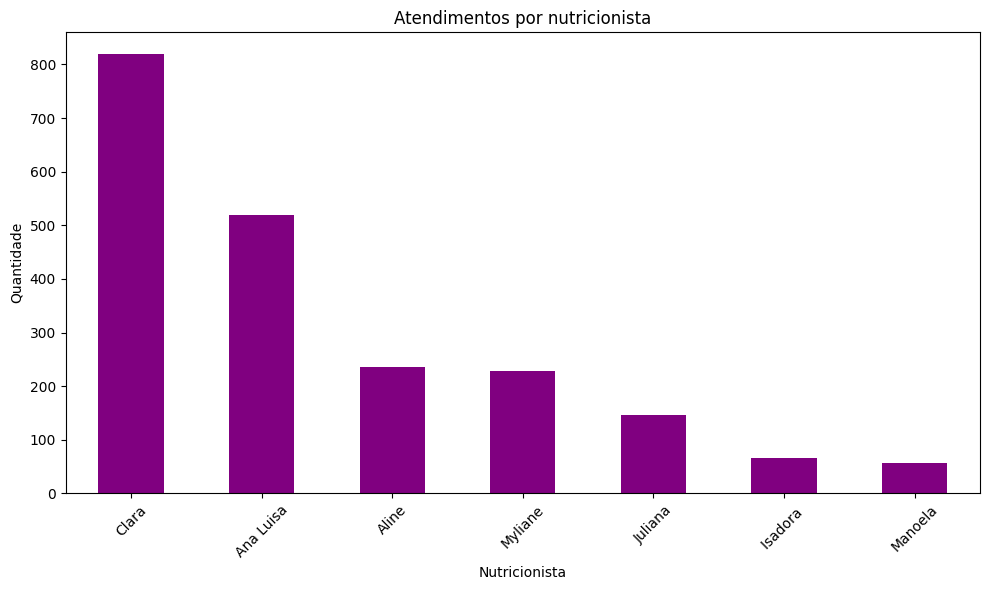

In [2]:
# Total de atendimentos
import matplotlib.pyplot as plt
print(f"Total de atendimentos: {len(df_b1)}")

# Atendimentos por nutricionista
print(f"Atendimentos por nutricionista:\n{df_b1['NUTRICIONISTA'].value_counts()}")

# Gráfico
plt.figure(figsize=(10,6))
df_b1['NUTRICIONISTA'].value_counts().plot(kind='bar', color = 'purple')
plt.title('Atendimentos por nutricionista')
plt.xlabel('Nutricionista')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total de atendimentos: 2071
Atendimentos por nutricionista:
NUTRICIONISTA
Clara        819
Ana Luisa    519
Aline        236
Myliane      229
Juliana      146
Isadora       66
Manoela       56
Name: count, dtype: int64


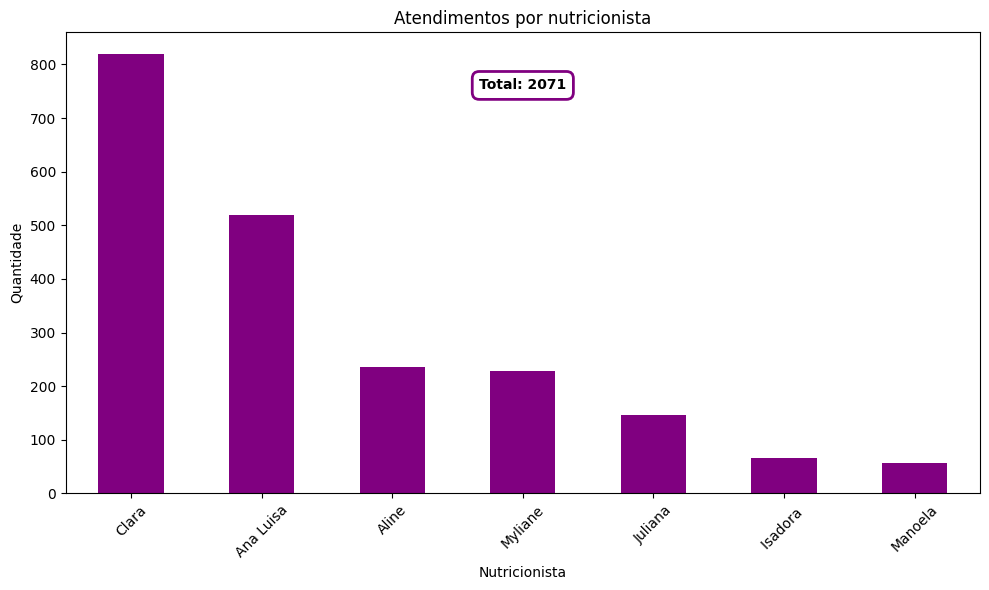

In [25]:
import matplotlib.pyplot as plt

# Total de atendimentos
total_atendimentos = len(df_b1)
print(f"Total de atendimentos: {total_atendimentos}")

# Atendimentos por nutricionista
print(f"Atendimentos por nutricionista:\n{df_b1['NUTRICIONISTA'].value_counts()}")

# Gráfico
plt.figure(figsize=(10,6))
df_b1['NUTRICIONISTA'].value_counts().plot(kind='bar', color='purple')
plt.title('Atendimentos por nutricionista')
plt.xlabel('Nutricionista')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Posição centralizada
x_centro = (len(df_b1['NUTRICIONISTA'].value_counts()) - 1) / 2
y_topo = plt.ylim()[1] * 0.9

# Texto com fundo transparente e borda roxa
plt.text(
    x_centro, y_topo,
    f'Total: {total_atendimentos}',
    horizontalalignment='center',
    verticalalignment='top',
    fontweight='bold',  # Negrito
    bbox=dict(facecolor='none', edgecolor='purple', boxstyle='round,pad=0.5', linewidth=2)  # Fundo transparente, borda roxa
)

plt.tight_layout()
plt.show()


# Atendimentos por mês no ano de 2024

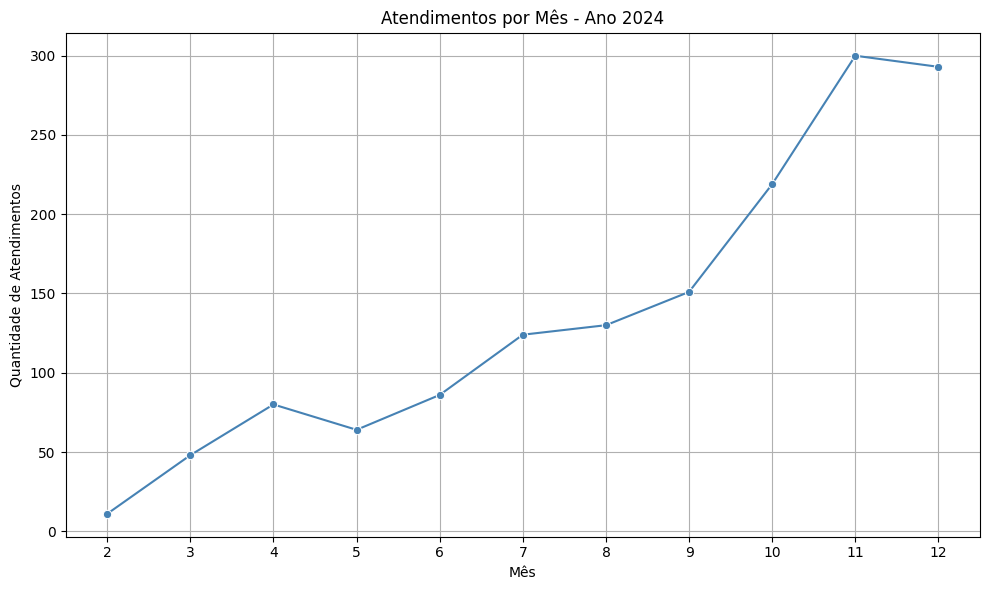

In [3]:
# Filtrar por mês
atend_por_mes = df_b1.groupby(['ANO', 'MES']).size().reset_index(name='ATENDIMENTOS')
#print(atend_por_mes)

# Filtrar apenas o ano de 2024
atend_2024 = atend_por_mes.query('ANO == 2024')
#print(atend_2024)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotando apenas 2024
plt.figure(figsize=(10,6))
sns.lineplot(data=atend_2024, x='MES', y='ATENDIMENTOS', marker='o', color='steelblue')
plt.title('Atendimentos por Mês - Ano 2024')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(atend_2024['MES'].unique())  # garantir que os meses apareçam corretamente no eixo X
plt.grid(True)
plt.tight_layout()
plt.show()

# Status dos atendimentos

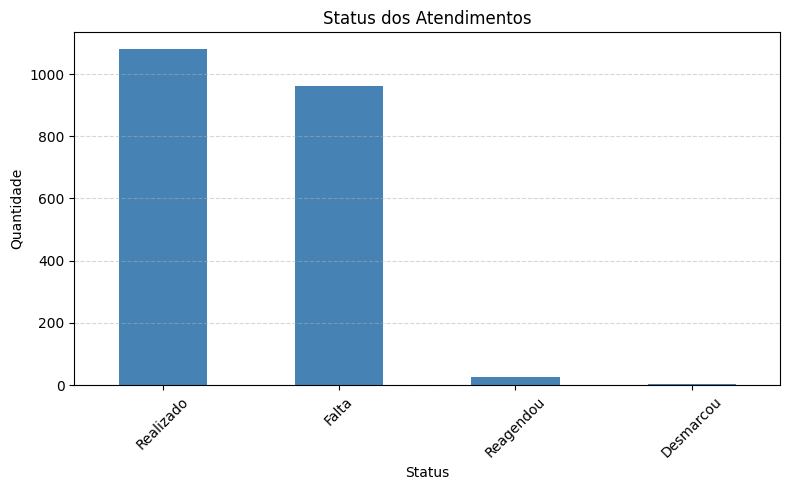

In [4]:
# Dados
status_counts = df_b1['STATUS_ATENDIMENTO_RC'].value_counts()

# Gráfico
plt.figure(figsize=(8,5))
status_counts.plot(kind='bar', color='steelblue')
plt.title('Status dos Atendimentos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Evolução Temporal dos Status dos atendimentos ao longo do ano de 2024

STATUS_ATENDIMENTO_RC
Realizado    1080
Falta         963
Reagendou      26
Desmarcou       2
Name: count, dtype: int64


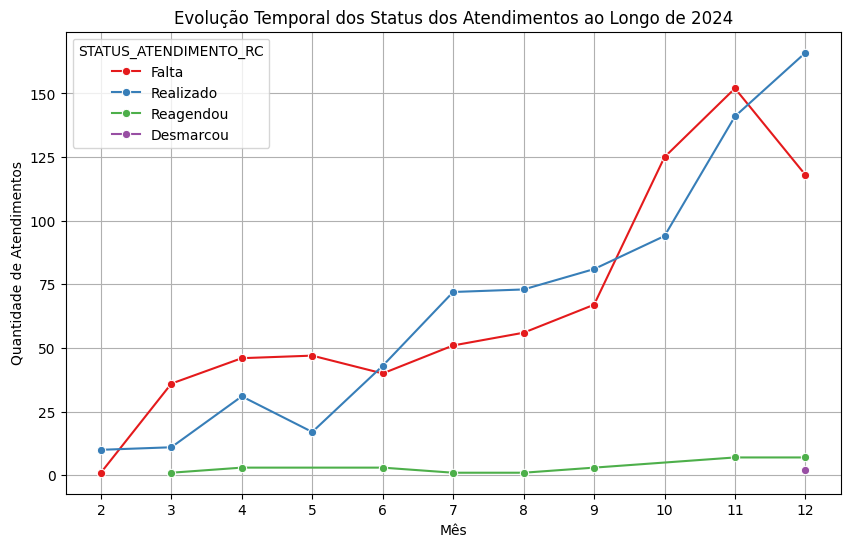

In [5]:
# Dados
status_counts = df_b1['STATUS_ATENDIMENTO_RC'].value_counts()
print(status_counts)

# Filtrar por mês
status_por_mes = df_b1.groupby(['ANO', 'MES', 'STATUS_ATENDIMENTO_RC']).size().reset_index(name='ATENDIMENTOS_RC')

# Filtrar apenas o ano de 2024
status_2024 = status_por_mes.query('ANO == 2024')

# Gráfico apenas 2024
plt.figure(figsize=(10,6))
sns.lineplot(data=status_2024, x='MES', y='ATENDIMENTOS_RC', hue='STATUS_ATENDIMENTO_RC', marker='o', palette='Set1')
plt.title('Evolução Temporal dos Status dos Atendimentos ao Longo de 2024')
plt.ylabel('Quantidade de Atendimentos')
plt.xlabel('Mês')
plt.xticks(status_2024['MES'].unique())  # garantir que os meses apareçam corretamente no eixo X
plt.grid(True)
plt.show()

# Objetivos dos Pacientes

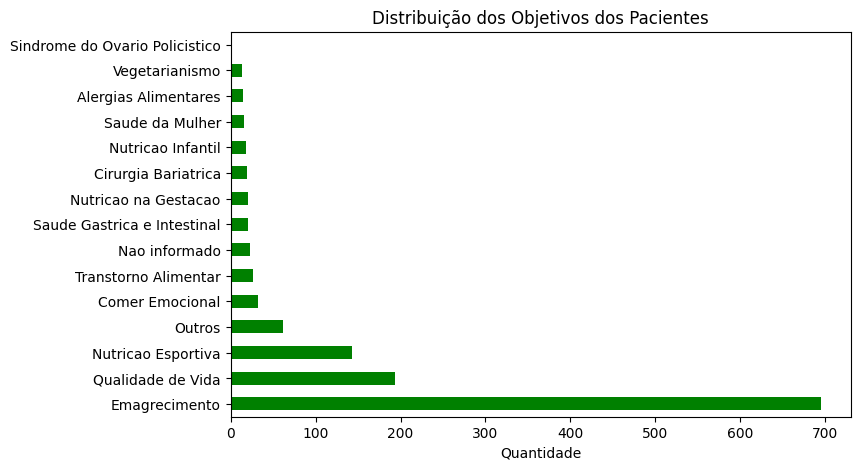

In [6]:
# Dados
objetivos = df_b1['OBJETIVO_PACIENTE_RC'].value_counts()

# Gráfico
plt.figure(figsize=(8,5))
objetivos.plot(kind='barh', color='green')
plt.title('Distribuição dos Objetivos dos Pacientes')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

# Engajamento - Tipos e Desfecho

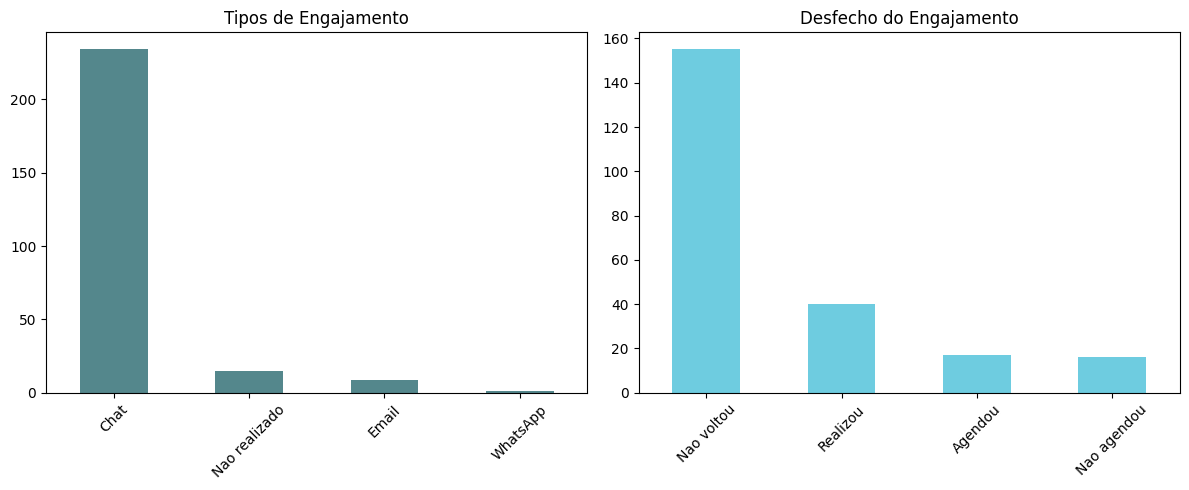

In [7]:
# Cria a figura e os eixos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Gráfico 1 - Tipo de Engajamento
df_b1['ENGAJAMENTO_STATUS_RC'].value_counts().plot(
    kind='bar',
    ax=axs[0],
    color='#54878c'
)
axs[0].set_title('Tipos de Engajamento')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Gráfico 2 - Desfecho do Engajamento
df_b1['ENGAJAMENTO_DESFECHO_RC'].value_counts().plot(
    kind='bar',
    ax=axs[1],
    color='#6ecce0'
)
axs[1].set_title('Desfecho do Engajamento')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].tick_params(axis='x', rotation=45)

# Ajusta layout para não sobrepor
plt.tight_layout()
plt.show()

# Correlação entre Tipo de Engajamento e Desfecho

ENGAJAMENTO_DESFECHO_RC  Agendou  Nao agendou  Nao voltou  Realizou
ENGAJAMENTO_STATUS_RC                                              
Chat                          12           16         150        34
Email                          0            0           3         6
WhatsApp                       0            0           1         0


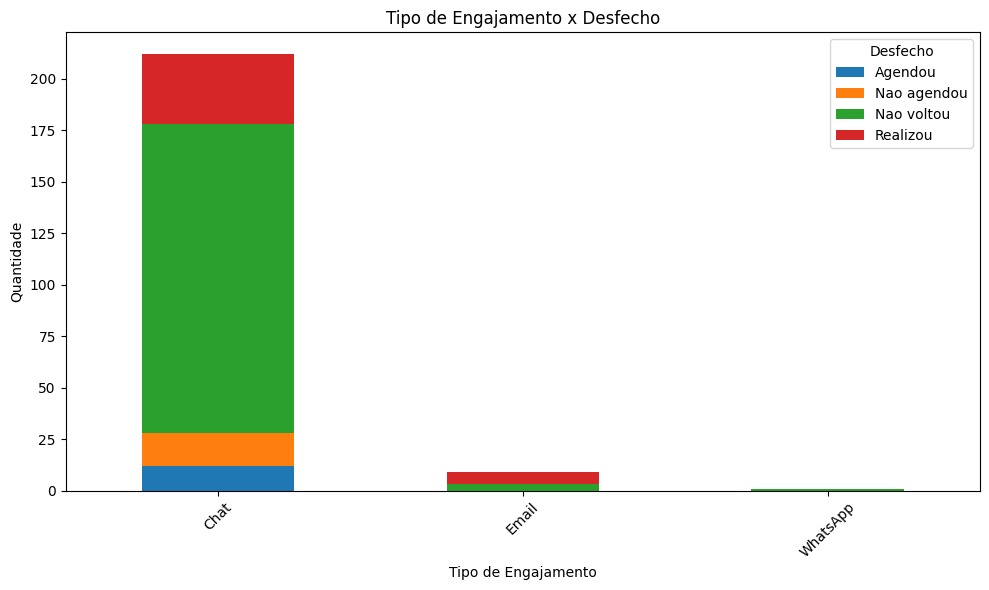

In [8]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['ENGAJAMENTO_STATUS_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])
print(tabela)

# Visualização com gráfico de barras empilhadas
tabela.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Tipo de Engajamento x Desfecho')
plt.xlabel('Tipo de Engajamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Desfecho')
plt.tight_layout()
plt.show()

# Teste de Chi-Quadrado (Tipo de Engajamento x Desfecho) - Verificando Associação Estatística

In [9]:
from scipy.stats import chi2_contingency

# Tabela de Contingência
tabela = pd.crosstab(df_b1['ENGAJAMENTO_STATUS_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

# Realiza o teste de chi-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Imprime os resultados
print(f"Chi-Square Statistic: {chi2: .2f}")
print(f"P-value: {p: .4f} ")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretação
alpha = 0.05
if p < alpha:
    print("As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC são associadas.")
else:
    print("As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.")

Chi-Square Statistic:  15.66
P-value:  0.0157 
Degrees of Freedom: 6
Expected Frequencies Table:
[[1.14594595e+01 1.52792793e+01 1.47063063e+02 3.81981982e+01]
 [4.86486486e-01 6.48648649e-01 6.24324324e+00 1.62162162e+00]
 [5.40540541e-02 7.20720721e-02 6.93693694e-01 1.80180180e-01]]
As variáveis ENGAJAMENTO_STATUS_RC e ENGAJAMENTO_DESFECHO_RC são associadas.


# Correlação entre Mensagem Enviada e Desfecho

ENGAJAMENTO_DESFECHO_RC     Agendou  Nao agendou  Nao voltou  Realizou
MENSAGEM_ENVIADA_RC                                                   
Padrao                            5            7          53        10
Padrao com material               7            8          69        24
Personalizada                     0            0          14         2
Personalizada com material        0            0           1         0


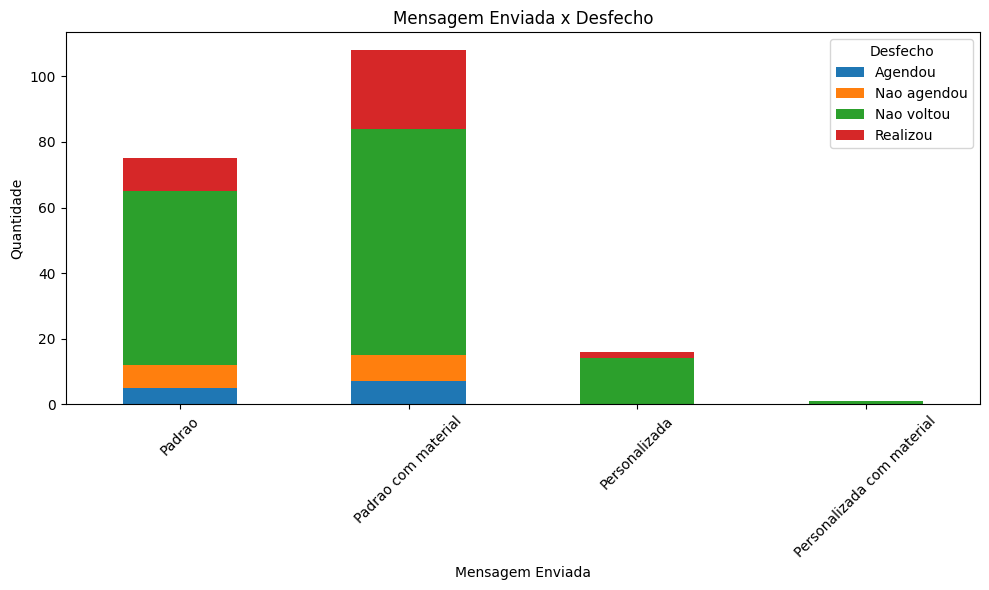

In [10]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['MENSAGEM_ENVIADA_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])
print(tabela)

# Visualização com gráfico de barras empilhadas
tabela.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Mensagem Enviada x Desfecho')
plt.xlabel('Mensagem Enviada')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Desfecho')
plt.tight_layout()
plt.show()

# Teste de Chi-Quadrado (Mensagem Enviada x Desfecho) - Verificando Associação Estatística

In [11]:
# Tabela de Contingência
tabela = pd.crosstab(df_b1['MENSAGEM_ENVIADA_RC'], df_b1['ENGAJAMENTO_DESFECHO_RC'])

# Realiza o teste de chi-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Imprime os resultados
print(f"Chi-Square Statistic: {chi2: .2f}")
print(f"P-value: {p: .4f} ")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretação
alpha = 0.05
if p < alpha:
    print("As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC são associadas.")
else:
    print("As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.")

Chi-Square Statistic:  6.53
P-value:  0.6859 
Degrees of Freedom: 9
Expected Frequencies Table:
[[4.5000e+00 5.6250e+00 5.1375e+01 1.3500e+01]
 [6.4800e+00 8.1000e+00 7.3980e+01 1.9440e+01]
 [9.6000e-01 1.2000e+00 1.0960e+01 2.8800e+00]
 [6.0000e-02 7.5000e-02 6.8500e-01 1.8000e-01]]
As variáveis MENSAGEM_ENVIADA_RC e ENGAJAMENTO_DESFECHO_RC não são associadas.


## Temos duas hipóteses a serem testadas:
### 1. Poucas pessoas concluem tendo chegado até a sexta consulta realizada
### 2. Para cada consulta realizada, há pelo menos mais uma interação de fracasso (fracasso = Reagendou, Falta)

# Testando hipótese 1

## Filtro dos que concluíram e Gráfico de casos encerrados por estágio de consulta

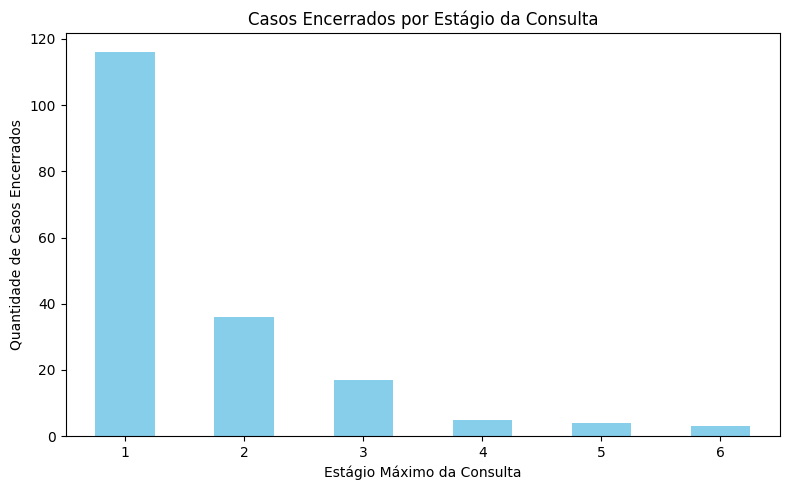

In [12]:
# Gráfico comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
contagem_estagio.plot(kind='bar', color='skyblue')
plt.title('Casos Encerrados por Estágio da Consulta')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('Quantidade de Casos Encerrados')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribuição Percentual de Estágios Máximos por Status do Caso

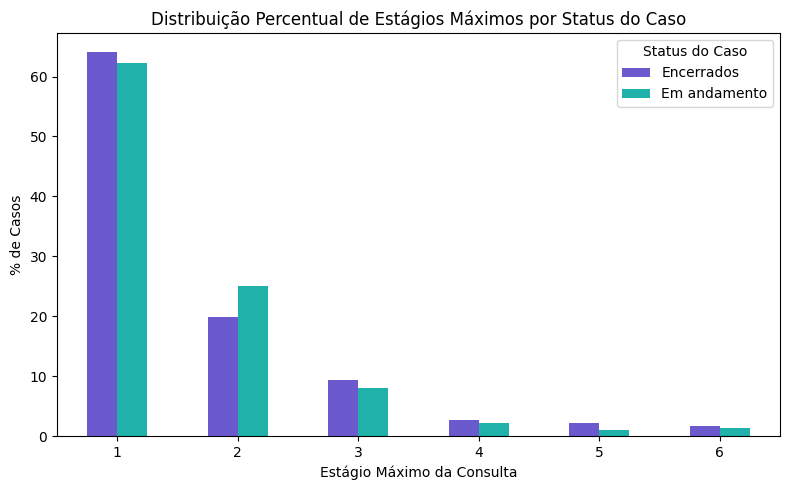

In [13]:
# Calcular a distribuição percentual de CONSULTA_ESTAGIO_MAX para casos encerrados
percent_encerrados = df_encerrados['CONSULTA_ESTAGIO_MAX'].value_counts(normalize=True).sort_index() * 100

# Calcular a distribuição percentual de CONSULTA_ESTAGIO_MAX para casos em andamento
percent_andamento = df_andamento['CONSULTA_ESTAGIO_MAX'].value_counts(normalize=True).sort_index() * 100

# Unir em um DataFrame para plotar lado a lado
df_percent = pd.DataFrame({
    'Encerrados': percent_encerrados,
    'Em andamento': percent_andamento
}).fillna(0)

# Plotar gráfico de colunas lado a lado
ax = df_percent.plot(kind='bar', figsize=(8,5), color=['#6a5acd', '#20b2aa'])
plt.title('Distribuição Percentual de Estágios Máximos por Status do Caso')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('% de Casos')
plt.xticks(rotation=0)
plt.legend(title='Status do Caso')
plt.tight_layout()
plt.show()

### Gráfico de barras empilhadas da quantidade de casos por estágio máximo da consulta 

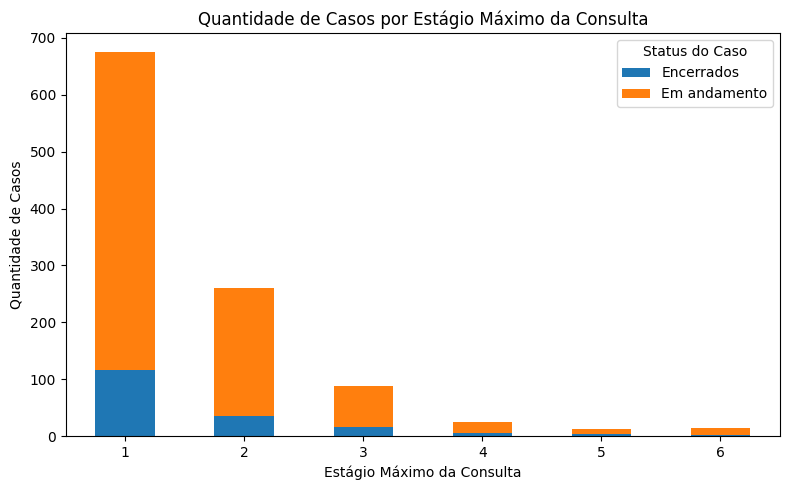

In [14]:
import matplotlib.pyplot as plt

# Separar os dados
df_encerrados = df_o1[df_o1['ENCERRAMENTO_CASO_P3'] == 'Caso encerrado']
df_andamento = df_o1[df_o1['ENCERRAMENTO_CASO_P3'] != 'Caso encerrado']

# Crosstab: quantidade por estágio para cada status
crosstab = pd.DataFrame({
    'Encerrados': df_encerrados['CONSULTA_ESTAGIO_MAX'].value_counts().sort_index(),
    'Em andamento': df_andamento['CONSULTA_ESTAGIO_MAX'].value_counts().sort_index()
}).fillna(0).astype(int)

# Plot
crosstab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8,5))
plt.title('Quantidade de Casos por Estágio Máximo da Consulta')
plt.xlabel('Estágio Máximo da Consulta')
plt.ylabel('Quantidade de Casos')
plt.legend(title='Status do Caso')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Testando hipótese 2

### Filtro dos que faltaram por grupo

/tmp/ipykernel_6582/941371679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_falta['INTERVENCAO_RC'] = filtro_falta['INTERVENCAO'].map({1: 'Intervenção', 0: 'Controle'})


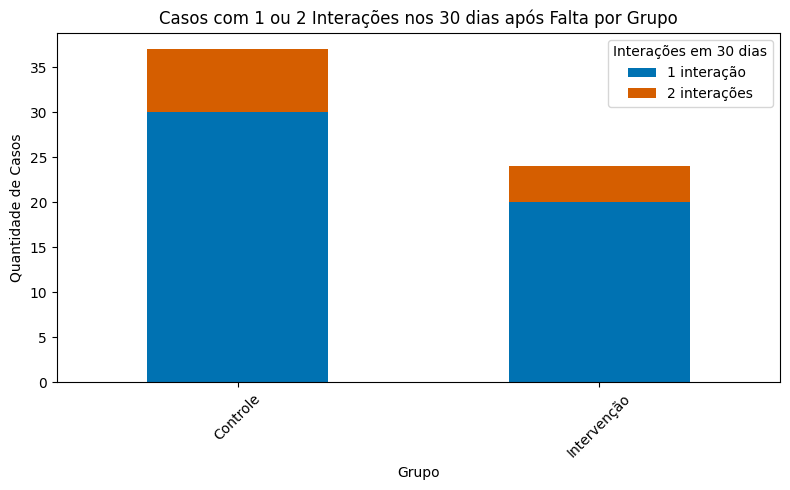

In [15]:
import matplotlib.pyplot as plt

# Criar coluna INTERVENCAO_RC para facilitar a leitura
filtro_falta['INTERVENCAO_RC'] = filtro_falta['INTERVENCAO'].map({1: 'Intervenção', 0: 'Controle'})

# Filtrar apenas casos com 1 ou 2 interações nos 30 dias após a falta
filtro_plot = filtro_falta[filtro_falta['30_DIAS_APOS_FALTA'].isin([1, 2])]

# Criar tabela cruzada para gráfico empilhado
tabela = filtro_plot.groupby(['INTERVENCAO_RC', '30_DIAS_APOS_FALTA']).size().unstack(fill_value=0)

# Plotar gráfico de barras empilhadas
tabela.plot(kind='bar', stacked=True, color=['#0072B2', '#D55E00'], figsize=(8,5))
plt.title('Casos com 1 ou 2 Interações nos 30 dias após Falta por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Casos')
plt.legend(title='Interações em 30 dias', labels=['1 interação', '2 interações'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Teste de Chi Quadrado 

Qui-Quadrado: 10.0140
p-valor: 0.0016
Graus de liberdade: 1
Frequências esperadas:
[[701.55555556  47.44444444]
 [200.44444444  13.55555556]]


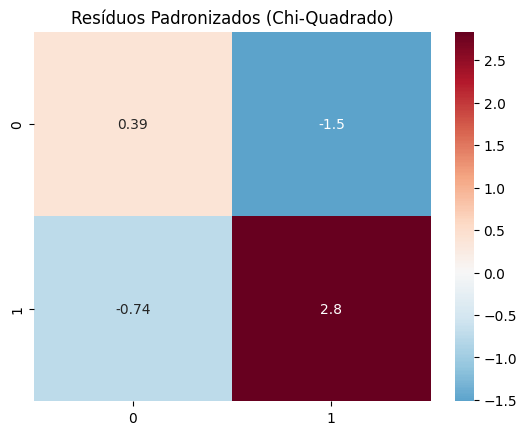

In [23]:
from scipy.stats import chi2_contingency

# Monta a tabela de contingência
contingencia = df_o4[['QTD_0_INTERACOES', 'QTD_1_2_INTERACOES']].values


# Teste do Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)
residuals = (contingencia - expected) / np.sqrt(expected)

print(f"Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

sns.heatmap(residuals, annot=True, center=0, cmap="RdBu_r")
plt.title('Resíduos Padronizados (Chi-Quadrado)')
plt.show()


### Distribuição de interações nos 30 dias após a falta por Grupo (Controle ou Intervenção)

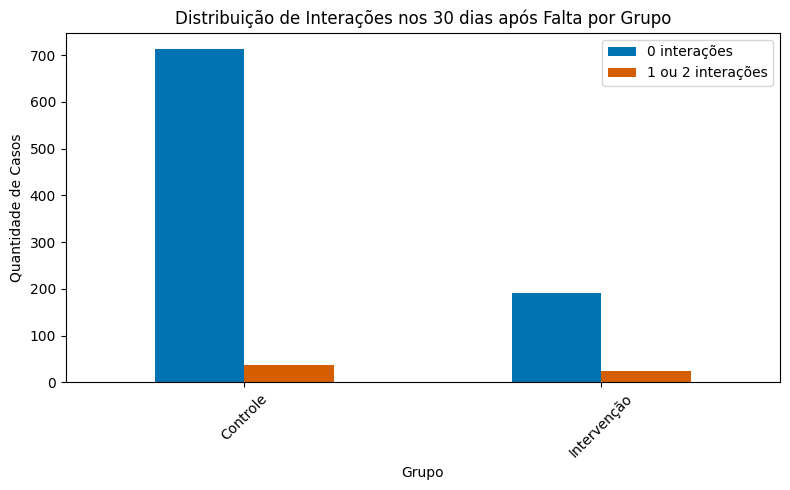

In [17]:
import matplotlib.pyplot as plt

# Gráfico de colunas agrupadas para df_o4
df_o4.set_index('INTERVENCAO_RC')[['QTD_0_INTERACOES', 'QTD_1_2_INTERACOES']].plot(
    kind='bar',
    figsize=(8,5),
    color=['#0072B2', '#D55E00']
)
plt.title('Distribuição de Interações nos 30 dias após Falta por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Casos')
plt.legend(['0 interações', '1 ou 2 interações'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribuição percentual de interações nos 30 dias após a falta por Grupo (Controle ou Intervenção)

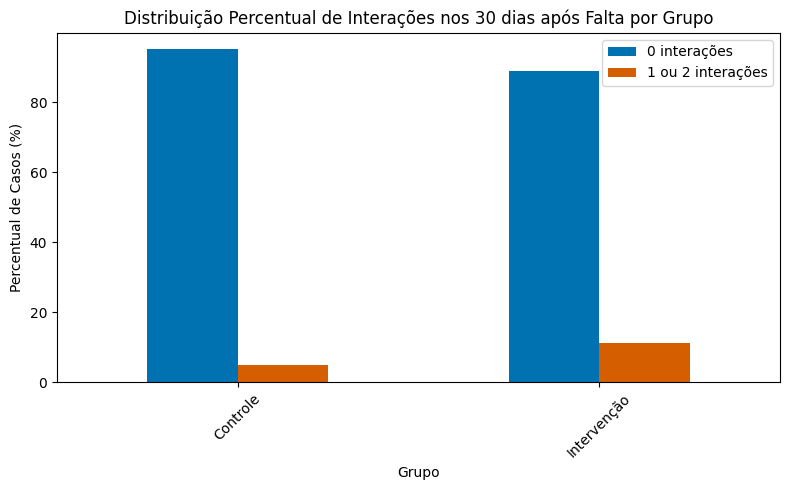

In [18]:
import matplotlib.pyplot as plt

# Calcula os percentuais para cada grupo
df_o4_percent = df_o4.copy()
total_por_grupo = df_o4_percent[['QTD_0_INTERACOES', 'QTD_1_2_INTERACOES']].sum(axis=1)
df_o4_percent['%_0_INTERACOES'] = df_o4_percent['QTD_0_INTERACOES'] / total_por_grupo * 100
df_o4_percent['%_1_2_INTERACOES'] = df_o4_percent['QTD_1_2_INTERACOES'] / total_por_grupo * 100

# Gráfico de barras agrupadas em porcentagem
df_o4_percent.set_index('INTERVENCAO_RC')[['%_0_INTERACOES', '%_1_2_INTERACOES']].plot(
    kind='bar',
    figsize=(8,5),
    color=['#0072B2', '#D55E00']
)
plt.title('Distribuição Percentual de Interações nos 30 dias após Falta por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Percentual de Casos (%)')
plt.legend(['0 interações', '1 ou 2 interações'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Casos com 1 ou 2 interações nos 30 dias após a falta por Grupo (Controle ou Intervenção)

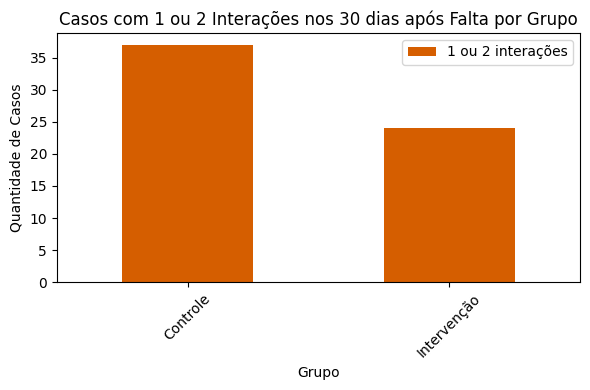

In [19]:
import matplotlib.pyplot as plt

# Filtra apenas os grupos com 1 ou 2 interações
df_o4_1_2 = df_o4.copy()
df_o4_1_2 = df_o4_1_2[df_o4_1_2['QTD_1_2_INTERACOES'] > 0]

# Gráfico de barras apenas para 1 ou 2 interações
df_o4_1_2.set_index('INTERVENCAO_RC')[['QTD_1_2_INTERACOES']].plot(
    kind='bar',
    figsize=(6,4),
    color=['#D55E00']
)
plt.title('Casos com 1 ou 2 Interações nos 30 dias após Falta por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Quantidade de Casos')
plt.legend(['1 ou 2 interações'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Casos com 1 ou 2 interações nos 30 dias após a falta por Grupo (Controle ou Intervenção) em percentual de casos

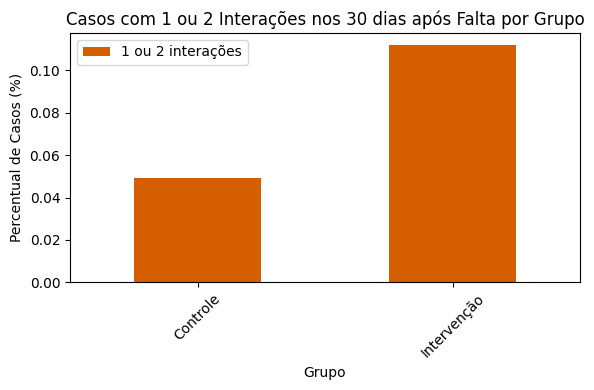

In [20]:
import matplotlib.pyplot as plt

# Filtra apenas os grupos com 1 ou 2 interações
df_o4_1_2 = df_o4.copy()
df_o4_1_2 = df_o4_1_2[df_o4_1_2['PERC_1_2_INTERACOES'] > 0]

# Gráfico de barras apenas para 1 ou 2 interações
df_o4_1_2.set_index('INTERVENCAO_RC')[['PERC_1_2_INTERACOES']].plot(
    kind='bar',
    figsize=(6,4),
    color=['#D55E00']
)
plt.title('Casos com 1 ou 2 Interações nos 30 dias após Falta por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Percentual de Casos (%)')
plt.legend(['1 ou 2 interações'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()